<a href="https://colab.research.google.com/github/faaizali124/DEP/blob/main/Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_csv("/content/churn-bigml-80.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
print(data.isnull().sum())

data['Churn'] = data['Churn'].apply(lambda x: 1 if x else 0)

print(data['Churn'].unique())

data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})

le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

data.head()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
[0 1]


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


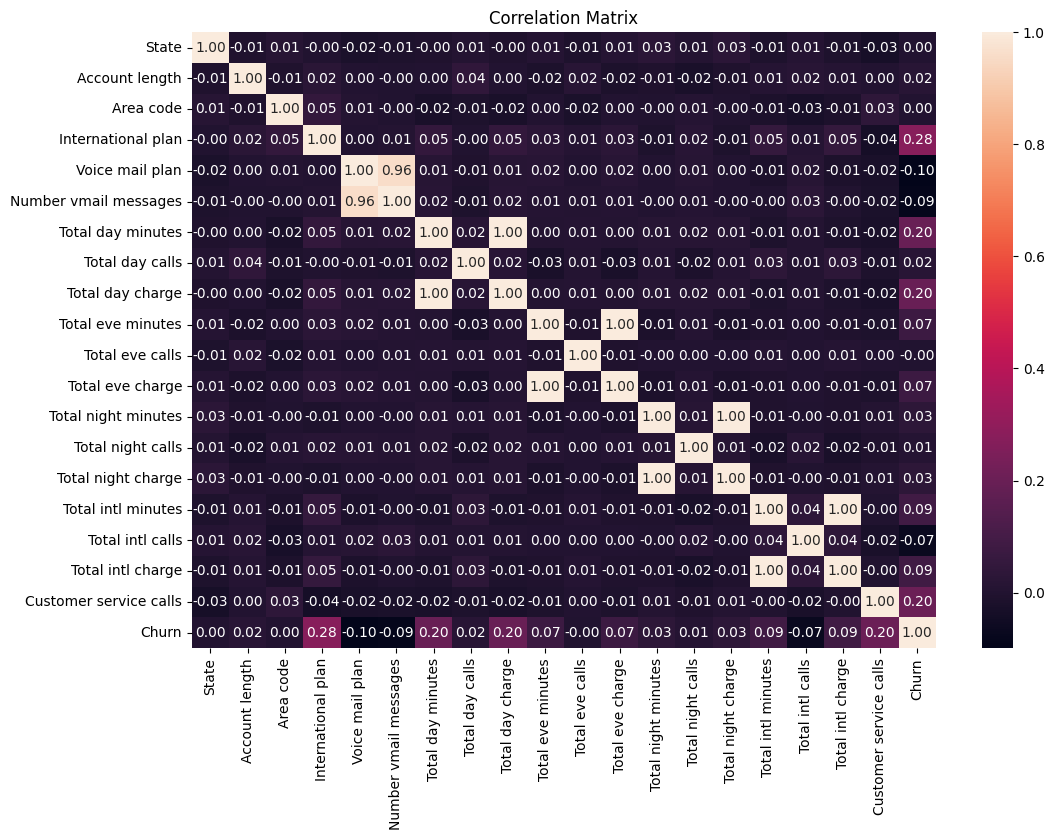

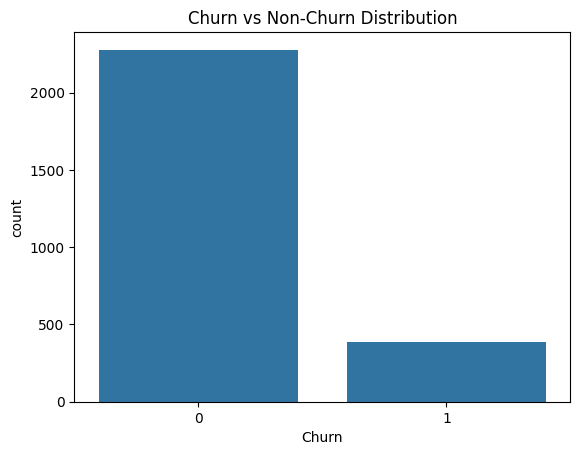

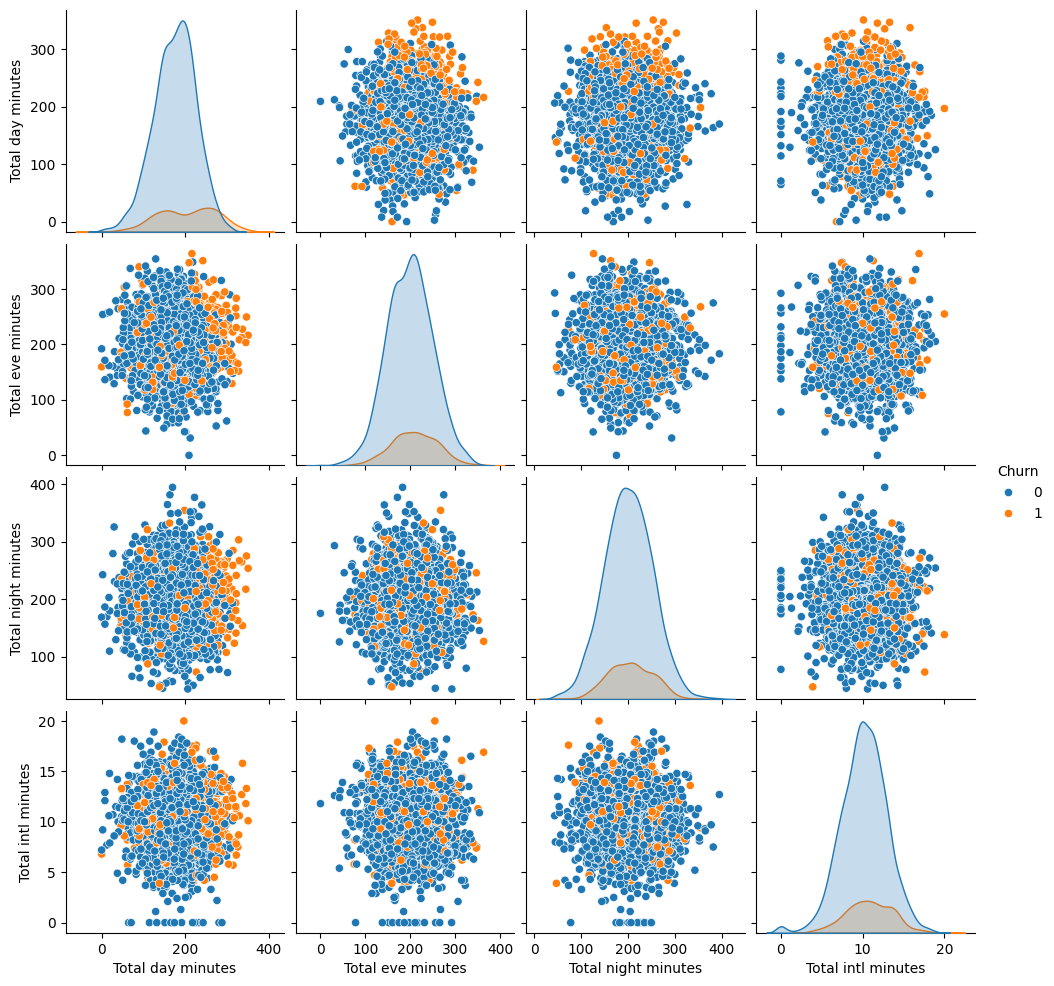

In [10]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution of churned vs non-churned customers
sns.countplot(x='Churn', data=data)
plt.title('Churn vs Non-Churn Distribution')
plt.show()

# Pairplot to visualize relationships between features and target variable
sns.pairplot(data, hue='Churn', vars=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'])
plt.show()

In [11]:
# 1. Average Call Duration (minutes per call)
data['Avg day call duration'] = data['Total day minutes'] / data['Total day calls']
data['Avg eve call duration'] = data['Total eve minutes'] / data['Total eve calls']
data['Avg night call duration'] = data['Total night minutes'] / data['Total night calls']

# 2. Charge per Minute
data['Day charge per minute'] = data['Total day charge'] / data['Total day minutes']
data['Eve charge per minute'] = data['Total eve charge'] / data['Total eve minutes']
data['Night charge per minute'] = data['Total night charge'] / data['Total night minutes']

# 3. Charge per Call
data['Day charge per call'] = data['Total day charge'] / data['Total day calls']
data['Eve charge per call'] = data['Total eve charge'] / data['Total eve calls']
data['Night charge per call'] = data['Total night charge'] / data['Total night calls']

data.fillna(0.0, inplace=True)

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
rf_pred = rf_model.predict(X_test)
print("Random Forest Model")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")

Random Forest Model
[[679   4]
 [ 43  74]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       683
           1       0.95      0.63      0.76       117

    accuracy                           0.94       800
   macro avg       0.94      0.81      0.86       800
weighted avg       0.94      0.94      0.94       800

Accuracy: 0.9413


In [14]:
import joblib

joblib.dump(rf_model, 'random_forest_churn_model.pkl')

['random_forest_churn_model.pkl']